# Finding potential Superhosts based on various features!

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks 
%matplotlib

Using matplotlib backend: Qt5Agg


# Reading Data and doing little bit of data exploration!

In [2]:
df= pd.read_csv('RecommendListings.csv')

In [3]:
df.head()

,id,name,host_id,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,city,latitude,longitude,...,minimum_nights,maximum_nights,number_of_reviews,requires_license,instant_bookable,cancellation_policy,guest_score,final_rev_score,booked,price
0,2078,Central comfy close to Metro Laurie,2277,0.0,0,1,6,Montreal,45.53069,-73.58588,...,2,7,245,0,1,2,0,9.55,0.279452,38
1,2843,Fabulous downtown/airport room,2319,1.0,0,5,7,Montreal,45.48442,-73.57923,...,1,365,139,0,1,1,0,9.20,0.224658,31
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t...",57358,1.0,1,1,8,Montreal,45.54135,-73.57814,...,3,1125,166,0,0,0,0,9.90,0.060274,175
3,29059,Lovely studio Quartier Latin,125031,1.0,0,3,8,Montreal,45.51888,-73.56546,...,3,60,307,0,0,1,0,9.60,0.134247,94
4,29061,Maison historique - Quartier Latin,125031,1.0,0,3,8,Montreal,45.52020,-73.56422,...,3,21,56,0,1,1,0,9.40,0.060274,145


In [4]:
df.shape

(47646, 31)

In [5]:
#Removing useless columns, here host_id
df=df.drop(columns=['host_id','id','name'],axis=1)

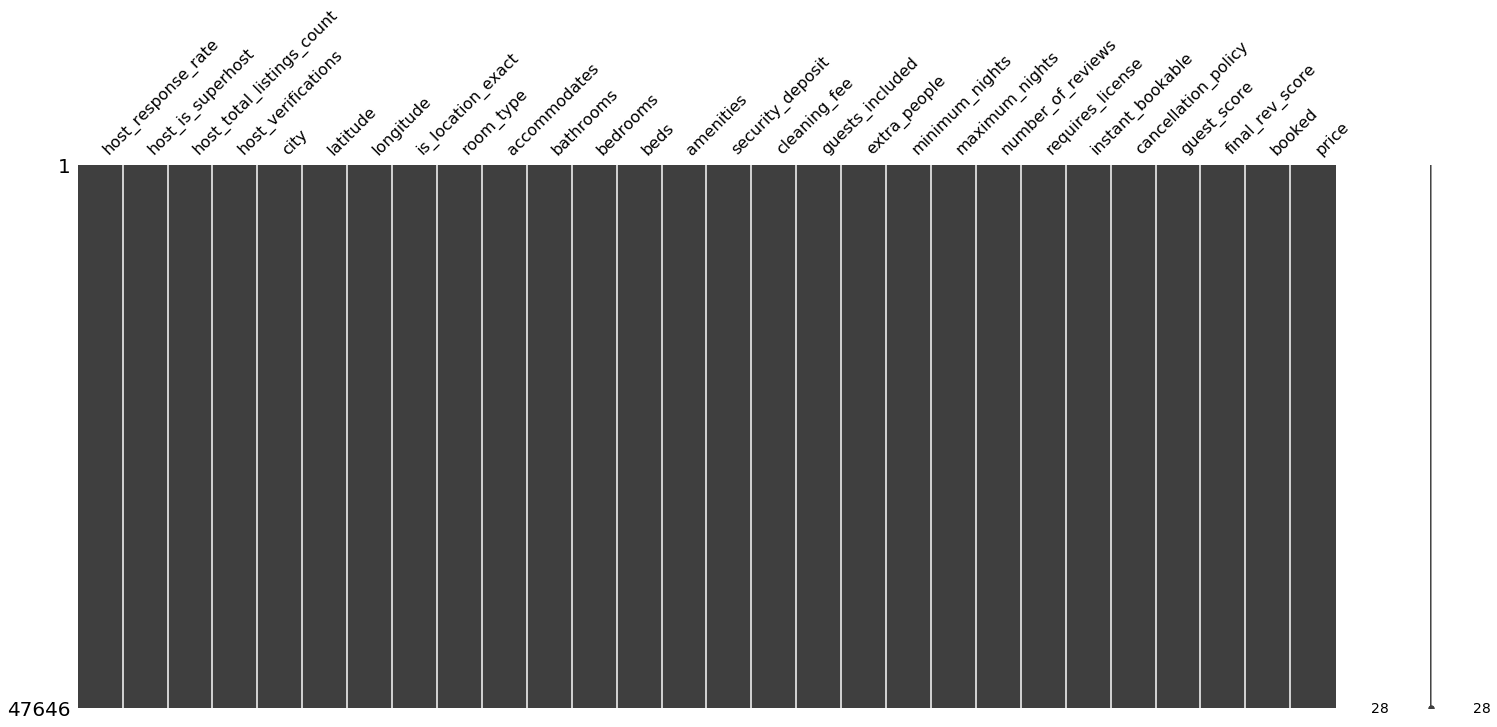

In [6]:
#checking if there is any missing value in the data!!
msno.matrix(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47646 entries, 0 to 47645
Data columns (total 28 columns):
host_response_rate           47646 non-null float64
host_is_superhost            47646 non-null int64
host_total_listings_count    47646 non-null int64
host_verifications           47646 non-null int64
city                         47646 non-null object
latitude                     47646 non-null float64
longitude                    47646 non-null float64
is_location_exact            47646 non-null int64
room_type                    47646 non-null object
accommodates                 47646 non-null int64
bathrooms                    47646 non-null float64
bedrooms                     47646 non-null int64
beds                         47646 non-null int64
amenities                    47646 non-null int64
security_deposit             47646 non-null int64
cleaning_fee                 47646 non-null int64
guests_included              47646 non-null int64
extra_people                 47

# categorical data to dummy variable or encoding!

In [8]:
df=pd.get_dummies(df, columns=['city'])

In [9]:
df=pd.get_dummies(df, columns=['room_type'])

# To avoid dummy variable trap, we need to drop one column each from dummy variables!

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47646 entries, 0 to 47645
Data columns (total 33 columns):
host_response_rate           47646 non-null float64
host_is_superhost            47646 non-null int64
host_total_listings_count    47646 non-null int64
host_verifications           47646 non-null int64
latitude                     47646 non-null float64
longitude                    47646 non-null float64
is_location_exact            47646 non-null int64
accommodates                 47646 non-null int64
bathrooms                    47646 non-null float64
bedrooms                     47646 non-null int64
beds                         47646 non-null int64
amenities                    47646 non-null int64
security_deposit             47646 non-null int64
cleaning_fee                 47646 non-null int64
guests_included              47646 non-null int64
extra_people                 47646 non-null int64
minimum_nights               47646 non-null int64
maximum_nights               4764

In [11]:
df=df.drop(columns=['room_type_Shared room','city_Vancouver'],axis=1)

# I want the column 'host_is_superhost' in the end for easily extracting it after Normalization!

In [12]:
cols = list(df.columns.values) 
cols.pop(cols.index('host_is_superhost'))
df = df[cols+['host_is_superhost']]

In [13]:
df.shape

(47646, 31)

# Pre-processing of the data!

In [14]:
data=df.values

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

# Splitting data into X and y

In [18]:
y=data[:,-1]

In [19]:
X=data[:,:-1]

In [20]:
X.shape

(47646, 30)

In [21]:
y.shape

(47646,)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(y)

numpy.ndarray

# Splitting data into Train, Validation and Testing set!!  [0.64 , 0.16 , 0.2]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# KNN Classifier!

In [31]:
from sklearn.neighbors import  KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.score(X_val,y_val)

0.7730849947534103

# RandomForest Classifier!

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_val,y_val)

0.863588667366212

# Adaboost Classifier!

In [33]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8377754459601259

# Support Vector Machine Classifier!

In [34]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)  
clf.score(X_test,y_test)

0.7507869884575026

# logistic Regression Classifier!

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_val,y_val)

0.7679695697796433

# Since, RF classifier outperformed everyone. Thus, tuning RF classifier!

In [45]:
RFscores={}
for i in range(10,250,10):
    clf = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=2, random_state=0)
    clf.fit(X_train,y_train)
    val=clf.score(X_val,y_val)
    RFscores[i]=val
    
    

In [46]:
x_axis= [i for i in range(10,250,10)]
y_axis=list(RFscores.values())

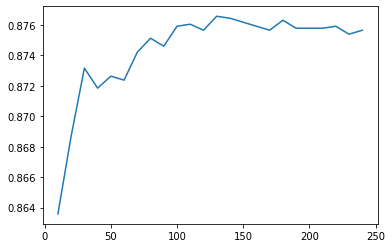

In [52]:
plt.plot(x_axis,y_axis)

In [54]:
index_max=max(RFscores, key=RFscores.get)

In [55]:
index_max

130

In [57]:
clf = RandomForestClassifier(n_estimators=130, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_val,y_val)

0.8765739769150053

In [58]:
clf.score(X_test,y_test)

0.8737670514165792

# 87.37% on Testing set! using Random Forest Classifier!